# Analyzing Austin PD's Crime Reports Dataset

The dataset is available from the Austin Police Department on https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu.


## Table of Contents 

    I. Introduction
    II. Data Scrubbing
    III. Exploratory Analysis 
    
    Questions:
><ul>
><li><a href="#q1"> 1. What areas of Austin have the highest crime rates?</a></li>
><li><a href="#q2"> 2. How is crime distributed in 78701?</a></li> 
><li><a href="#q3"> 3. How is crime distributed in 78753?</a></li>     
><li><a href="#q4"> 4. How is crime distributed in 78741?</a></li>
><li><a href="#q5"> 5. How is crime distributed in 78745?</a></li>
><li><a href="#q6"> 6. How is crime distributed in 78705?</a></li>
><li><a href="#q7"> 7. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed?
><li><a href="#q8"> 8. How is crime distributed across different districts and sectors around Austin? Location types?
><li><a href="#q9"> 9. How does violent crime appear on the map?
><li><a href="#q10"> 10. Are there any addresses where violent crime and murder occurs frequently?
</a></li>

## I. Introduction

I began reviewing the Crime Reports dataset, provided by the Austin PD, around the same time I began reviewing its Hate Crimes datasets for analysis, at the beginning of 2020. This is a rather large dataset, containing over 2 million records, spanning from 2003 to the present, and is updated weekly. 

This is a self-paced project, conceived outside of both work and the educational arenas. It is my hope that this project will reveal some actionable insights that will benefit the Austin law enforcement community, news outlets, and anyone else interested in gaining knowledge on how best to combat the problem of crime in the Austin area.

I first attempted importing the data into this notebook using Sodapy's Socrata API method but found it lacking. It didn't import the entire dataset, and added several redundant columns. I, therefore, prefer to manually download the entire dataset and re-download each week after it's updated.

In [8]:
# importing necessary libraries and configurations
import folium
from folium import plugins

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import warnings

# plt.style.use("fivethirtyeight")
plt.style.use("ggplot")
# plt.style.use("classic")
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# loading the data
df = pd.read_csv("crime_reports.csv")
# df = pd.read_csv("df_clean.csv")

# df.occurred_date = df.occurred_date.astype("datetime64")
# df.set_index(["occurred_date"], inplace=True)
# df.sort_index(inplace=True)

In [3]:
# examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303967 entries, 0 to 2303966
Data columns (total 27 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Address                      object 
 12  Zip Code                     float64
 13  Council District             float64
 14  APD Sector                   object 
 15  APD District                 object 
 16  PRA                          object 
 17  Census Tract                 float64
 18  Clearance Status             object 
 19  

None

Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 165
Occurred Date                        0
Occurred Time                       84
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    21064
Address                             12
Zip Code                         14183
Council District                 47136
APD Sector                        9009
APD District                      9484
PRA                              10749
Census Tract                   1579049
Clearance Status                606135
Clearance Date                  336930
UCR Category                   1517899
Category Description           1517899
X-coordinate                     10166
Y-coordinate                     10166
Latitude                         38924
Longitude                

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,20191571574,FRAUD - OTHER,1199,N,06/03/2019 04:00:00 PM,06/03/2019,1600.0,06/06/2019 05:34:00 PM,06/06/2019,1734.0,DEPARTMENT / DISCOUNT STORE,10817 BALLARD PATH,78717.0,6.0,AD,5,573.0,203.11,NaN,NaN,NaN,NaN,3097785.0,3097785.0,30.483646,-97.789495,"(30.48364631, -97.7894953)"
1,20191550153,DEADLY CONDUCT,408,N,06/04/2019 03:12:00 AM,06/04/2019,312.0,06/04/2019 03:16:00 AM,06/04/2019,316.0,RESIDENCE / HOME,8312 N IH 35 SVRD SB,78753.0,4.0,ED,1,250.0,18.06,N,06/06/2019,13A,Aggravated Assault,3128227.0,3128227.0,30.346646,-97.696573,"(30.34664576, -97.69657342)"
2,20195022816,THEFT OF LICENSE PLATE,614,N,06/03/2019 03:00:00 PM,06/03/2019,1500.0,06/04/2019 03:22:00 PM,06/04/2019,1522.0,RESIDENCE / HOME,6312 LIBYAN DR,78745.0,2.0,FR,4,509.0,24.09,N,06/04/2019,23G,Theft,3098393.0,3098393.0,30.205267,-97.794900,"(30.20526729, -97.79490043)"
3,20205007833,RUNAWAY CHILD,4100,N,02/22/2020 06:00:00 PM,02/22/2020,1800.0,02/24/2020 06:03:00 PM,02/24/2020,1803.0,RESIDENCE / HOME,13012 DEARBONNE DR,78617.0,2.0,HE,7,612.0,NaN,N,03/03/2020,NaN,NaN,3155456.0,3155456.0,30.176140,-97.615031,"(30.17613952, -97.6150307)"
4,20191671388,BURGLARY OF RESIDENCE,500,N,06/14/2019 12:00:00 PM,06/14/2019,1200.0,06/16/2019 10:00:00 PM,06/16/2019,2200.0,RESIDENCE / HOME,3809 SPICEWOOD SPRINGS RD EB,78731.0,10.0,BA,8,256.0,17.51,N,09/18/2019,220,Burglary,3111039.0,3111039.0,30.364987,-97.750587,"(30.36498691, -97.75058749)"


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
2303962,20092372178,VIOL OF COURT ORDER-NON EPO-PO,2008,N,08/25/2009 09:09:00 PM,08/25/2009,2109.0,08/25/2009 09:09:00 PM,08/25/2009,2109.0,COMMERCIAL / OFFICE BUILDING,11705 RESEARCH BLVD SVRD NB,78727.0,6.0,AD,3,191.0,NaN,NaN,NaN,NaN,NaN,3111919.0,3111919.0,30.419515,-97.746334,"(30.41951491, -97.74633376)"
2303963,2018760421,BURGLARY OF RESIDENCE,500,N,03/17/2018 04:26:00 AM,03/17/2018,426.0,03/17/2018 04:26:00 AM,03/17/2018,426.0,HOTEL / MOTEL / ETC.,11901 PAVILION BLVD,78759.0,10.0,AD,7,190.0,NaN,N,04/11/2018,220,Burglary,3109342.0,3109342.0,30.424605,-97.754376,"(30.42460539, -97.75437566)"
2303964,2016141853,WARRANT ARREST NON TRAFFIC,3442,N,01/14/2016 11:00:00 PM,01/14/2016,2300.0,01/14/2016 11:00:00 PM,01/14/2016,2300.0,STREETS / HWY / ROAD / ALLEY,MOORE BLVD / WALLING DR,78705.0,9.0,BA,1,346.0,NaN,C,01/18/2016,NaN,NaN,3116717.0,3116717.0,30.294398,-97.734481,"(30.29439835, -97.73448064)"
2303965,20032090302,THEFT,600,N,07/28/2003 12:01:00 AM,07/28/2003,1.0,07/28/2003 06:46:00 AM,07/28/2003,646.0,RESIDENCE / HOME,12200 SCRIBE DR,78759.0,7.0,AD,3,200.0,NaN,NaN,NaN,23H,Theft,3122216.0,3122216.0,30.415205,-97.713773,"(30.41520466, -97.71377329)"
2303966,20065061156,BURGLARY OF VEHICLE,601,N,11/19/2006 12:00:00 AM,11/19/2006,0.0,11/19/2006 05:19:00 AM,11/19/2006,519.0,RESIDENCE / HOME,4703 AVENUE F,78751.0,9.0,BA,5,319.0,NaN,NaN,11/20/2006,23F,Theft,3119574.0,3119574.0,30.311194,-97.724972,"(30.31119411, -97.72497177)"


## II. Data Prep

There are several columns we don't need which we'll drop. We'll index the data according to the OCCURRED DATE TIME column. The following code creates a reproducible script for scrubbing and parsing the data.

In [4]:
def clean_data(df):
    drop_col = [
        "Incident Number",
        "Occurred Time",
        "Occurred Date Time",
        "Highest Offense Code",
        "Census Tract",
        "PRA",
        "Report Date",
        "Report Time",
        "UCR Category",
        "Category Description",
        "X-coordinate",
        "Y-coordinate",
        "Location",
    ]
    df.drop(drop_col, axis=1, inplace=True)
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
    fillna = [
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
    ]
    df[fillna].fillna("N/A", inplace=True)
    date_col = ["occurred_date", "report_date_time", "clearance_date"]
    cat_col = [
        "highest_offense_description",
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
    ]
    df[date_col] = df[date_col].astype("datetime64")
    df[cat_col] = df[cat_col].astype("category")
    df["year"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.year
    df["month"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.month
    df["week"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.week
    df["day"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.day
    df.set_index(["occurred_date"], inplace=True)
    df.sort_index(inplace=True)
    return df


df = clean_data(df)

In [5]:
df.duplicated().sum()

828

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## III. Exploratory Analysis

<a id='q1'></a>
### A. Question 1. What areas of Austin have the highest crime rates? 

78741.0    206841
78753.0    179036
78701.0    168439
78758.0    159436
78704.0    154723
78745.0    150884
78702.0    136819
78744.0    126385
78723.0    118500
78752.0     84510
78748.0     68175
78759.0     66405
78751.0     64107
78757.0     57978
78705.0     57147
78721.0     47756
78749.0     40451
78724.0     37690
78727.0     35904
78703.0     35206
78731.0     28686
78746.0     28132
78729.0     25309
78750.0     23755
78754.0     22869
Name: zip_code, dtype: int64

78741.0    0.090365
78753.0    0.078217
78701.0    0.073588
78758.0    0.069654
78704.0    0.067595
78745.0    0.065918
78702.0    0.059773
78744.0    0.055215
78723.0    0.051770
78752.0    0.036921
78748.0    0.029784
78759.0    0.029011
78751.0    0.028007
78757.0    0.025329
78705.0    0.024966
78721.0    0.020864
78749.0    0.017672
78724.0    0.016466
78727.0    0.015686
78703.0    0.015381
78731.0    0.012532
78746.0    0.012290
78729.0    0.011057
78750.0    0.010378
78754.0    0.009991
Name: zip_code, dtype: float64

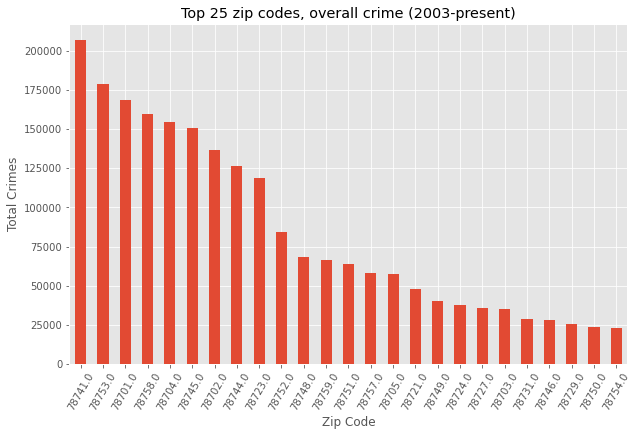

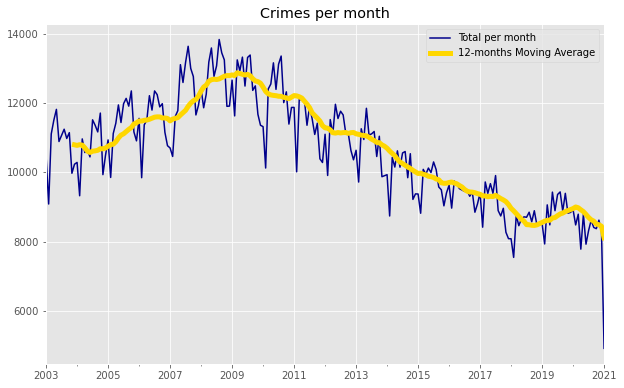

In [9]:
# Create and show dataframe for crime rates by zipcode and as percentages
display(df.zip_code.value_counts().head(25))
display(df.zip_code.value_counts(normalize=True).head(25))

# Visualizing the top 25 areas for crime
df.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes, overall crime (2003-present)",
    figsize=(10, 6.25),
    xlabel="Zip Code",
    ylabel="Total Crimes",
    rot=60,
)
plt.show()

# Using resample 'M' and rolling window 12
plt.figure(figsize=(10, 6.25))
df.resample("M").size().plot(color="darkblue", linewidth=1.5, label="Total per month")
df.resample("M").size().rolling(window=12).mean().plot(
    color="gold", linewidth=5, label="12-months Moving Average"
)
plt.title("Crimes per month")
plt.xlabel("")
plt.legend()
plt.show()

### B. Examining the top crime types in Austin 

BURGLARY OF VEHICLE               231110
THEFT                             211619
FAMILY DISTURBANCE                179298
CRIMINAL MISCHIEF                 127476
ASSAULT W/INJURY-FAM/DATE VIOL     78061
BURGLARY OF RESIDENCE              77093
DWI                                69598
PUBLIC INTOXICATION                68748
HARASSMENT                         64235
DISTURBANCE - OTHER                61591
Name: highest_offense_description, dtype: int64

,BURGLARY OF VEHICLE,PUBLIC INTOXICATION,ASSAULT W/INJURY-FAM/DATE VIOL,THEFT,DWI,CRIMINAL MISCHIEF,FAMILY DISTURBANCE,BURGLARY OF RESIDENCE,TOTAL
occurred_date,,,,,,,,,
2020-09-30,928,51,252,607,147,504,794,146,3429
2020-10-31,420,74,253,616,196,551,881,162,3153
2020-11-30,483,71,282,638,183,506,864,162,3189
2020-12-31,419,50,253,601,165,476,825,185,2974
2021-01-31,303,39,180,320,123,291,422,98,1776


<Figure size 432x288 with 0 Axes>

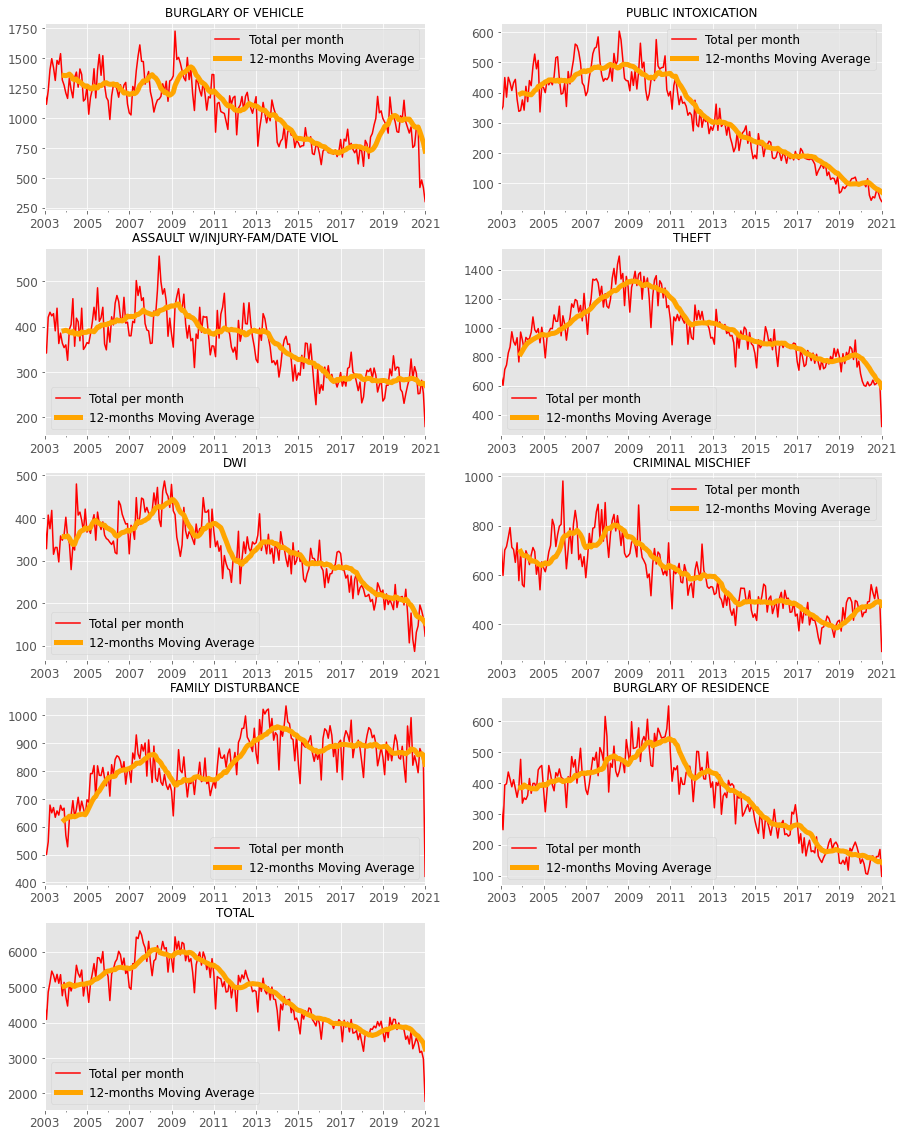

In [10]:
display(df["highest_offense_description"].value_counts().head(10))

df2 = df.query(
    'highest_offense_description == ["BURGLARY OF VEHICLE", "THEFT", "FAMILY DISTURBANCE", "CRIMINAL MISCHIEF", "ASSAULT W/INJURY-FAM/DATE VIOL", "BURGLARY OF RESIDENCE", "DWI", "PUBLIC INTOXICATION"]'
)

monthly = pd.DataFrame(
    df2[df2["highest_offense_description"] == "BURGLARY OF VEHICLE"]
    .resample("M")
    .size()
)
monthly.columns = ["BURGLARY OF VEHICLE"]

for i in df2["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df2[df2["highest_offense_description"] == i].resample("M").size()
    )

monthly["TOTAL"] = monthly.sum(axis=1)

crimeType = monthly.columns

display(monthly.tail())

plt.figure(1)
plt.figure(figsize=(15, 20))

i = 521
for eachCrime in crimeType:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12-months Moving Average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1
plt.show()

<a id='q2'></a>
### C. How is crime distributed in 78701 (downtown Austin)? 

PUBLIC INTOXICATION               17149
THEFT                             15766
BURGLARY OF VEHICLE                9262
WARRANT ARREST NON TRAFFIC         8966
DWI                                8319
ASSAULT WITH INJURY                7523
VIOL CITY ORDINANCE - OTHER        6187
POSS OF DRUG PARAPHERNALIA         6035
CRIMINAL MISCHIEF                  5814
CRIMINAL TRESPASS                  3912
POSSESSION OF MARIJUANA            3383
DISTURBANCE - OTHER                3351
CUSTODY ARREST TRAFFIC WARR        2993
POSS CONTROLLED SUB/NARCOTIC       2895
CAMPING IN PARK                    2785
VOCO - ALCOHOL  CONSUMPTION        2690
CRIMINAL TRESPASS/TRANSIENT        2583
ASSAULT BY CONTACT                 2582
THEFT OF BICYCLE                   2508
URINATING IN PUBLIC PLACE          2336
FAMILY DISTURBANCE                 2151
DOC FIGHTING                       2108
PROTECTIVE ORDER                   2099
ASSAULT W/INJURY-FAM/DATE VIOL     1727
Name: highest_offense_description, dtype

PUBLIC INTOXICATION               0.101811
THEFT                             0.093601
BURGLARY OF VEHICLE               0.054987
WARRANT ARREST NON TRAFFIC        0.053230
DWI                               0.049389
ASSAULT WITH INJURY               0.044663
VIOL CITY ORDINANCE - OTHER       0.036731
POSS OF DRUG PARAPHERNALIA        0.035829
CRIMINAL MISCHIEF                 0.034517
CRIMINAL TRESPASS                 0.023225
POSSESSION OF MARIJUANA           0.020084
DISTURBANCE - OTHER               0.019894
CUSTODY ARREST TRAFFIC WARR       0.017769
POSS CONTROLLED SUB/NARCOTIC      0.017187
CAMPING IN PARK                   0.016534
VOCO - ALCOHOL  CONSUMPTION       0.015970
CRIMINAL TRESPASS/TRANSIENT       0.015335
ASSAULT BY CONTACT                0.015329
THEFT OF BICYCLE                  0.014890
URINATING IN PUBLIC PLACE         0.013869
FAMILY DISTURBANCE                0.012770
DOC FIGHTING                      0.012515
PROTECTIVE ORDER                  0.012461
ASSAULT W/I

<AxesSubplot:title={'center':'Crime Distribution (78701)'}, ylabel='highest_offense_description'>

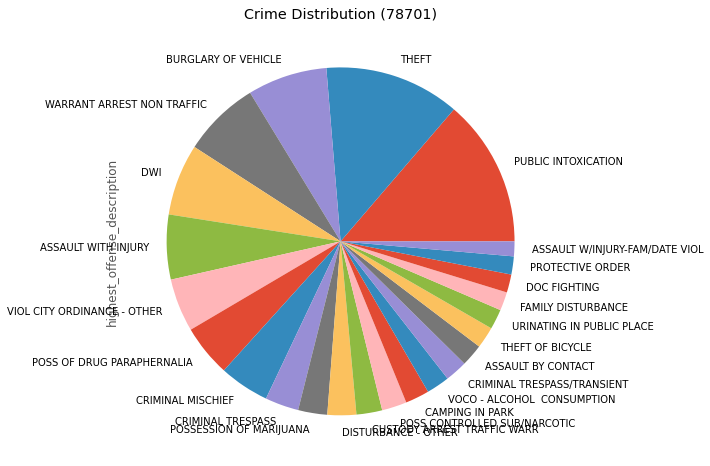

In [11]:
# Examining crime in the 78701 area
df_01 = df[df.zip_code == 78701]

# Create a dataframe for the top crime categories in the zipcode
df_01_off = df_01.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_01_off)
display(df_01.highest_offense_description.value_counts(normalize=True).head(24))
df_01_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78701)")

<a id='q3'></a>
### C. Question 2. How is crime distributed in 78753? 

THEFT                             17130
BURGLARY OF VEHICLE               15935
FAMILY DISTURBANCE                14663
CRIMINAL MISCHIEF                  9468
THEFT BY SHOPLIFTING               7633
ASSAULT W/INJURY-FAM/DATE VIOL     7149
BURGLARY OF RESIDENCE              6066
DWI                                5005
DISTURBANCE - OTHER                4764
CUSTODY ARREST TRAFFIC WARR        4348
HARASSMENT                         4251
AUTO THEFT                         4221
POSS OF DRUG PARAPHERNALIA         3725
PUBLIC INTOXICATION                3368
ASSAULT WITH INJURY                3305
CRIMINAL TRESPASS                  3140
POSS CONTROLLED SUB/NARCOTIC       2972
RUNAWAY CHILD                      2932
WARRANT ARREST NON TRAFFIC         2795
POSSESSION OF MARIJUANA            2705
BURGLARY NON RESIDENCE             2485
VIOL CITY ORDINANCE - OTHER        1866
Name: highest_offense_description, dtype: int64
----------------------------------
THEFT                             0.0

<AxesSubplot:title={'center':'Crime Distribution (78753)'}, ylabel='highest_offense_description'>

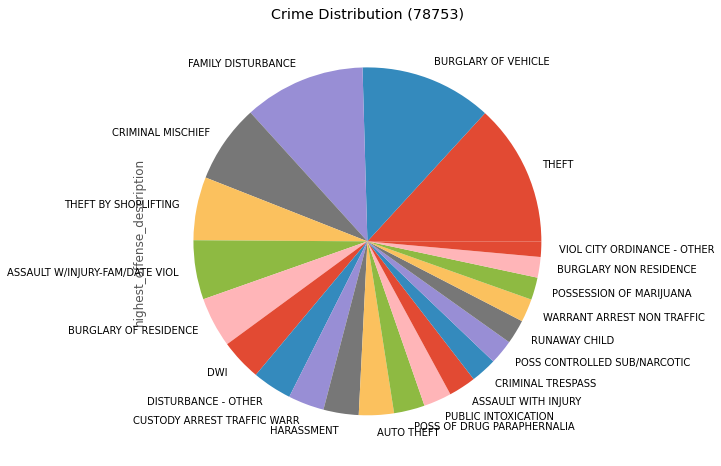

In [12]:
# Examining crime in the 78753 area
df_53 = df[df.zip_code == 78753]

# Create a dataframe for the top 10 crime categories in the zipcode
df_53_off = df_53.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
print(df_53_off)
print("----------------------------------")
print(df_53.highest_offense_description.value_counts(normalize=True).head(22))
df_53_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78753)")

<a id='q4'></a>
### D. Question 4. How is crime distributed in 78741 (E Riverside/Oltorf)? 

FAMILY DISTURBANCE                20335
BURGLARY OF VEHICLE               19800
THEFT                             15591
CRIMINAL MISCHIEF                 11043
ASSAULT W/INJURY-FAM/DATE VIOL     9623
BURGLARY OF RESIDENCE              8877
PUBLIC INTOXICATION                6380
CUSTODY ARREST TRAFFIC WARR        6011
DWI                                5659
HARASSMENT                         5518
DISTURBANCE - OTHER                5162
AUTO THEFT                         4627
ASSAULT WITH INJURY                4532
CRIMINAL TRESPASS                  3917
POSS CONTROLLED SUB/NARCOTIC       3862
POSSESSION OF MARIJUANA            3792
THEFT BY SHOPLIFTING               3575
POSS OF DRUG PARAPHERNALIA         3538
WARRANT ARREST NON TRAFFIC         3448
RUNAWAY CHILD                      2790
VIOL CITY ORDINANCE - OTHER        2195
Name: highest_offense_description, dtype: int64
----------------------------------
FAMILY DISTURBANCE                0.098312
BURGLARY OF VEHICLE               

<AxesSubplot:title={'center':'Crime Distribution (78741)'}, ylabel='highest_offense_description'>

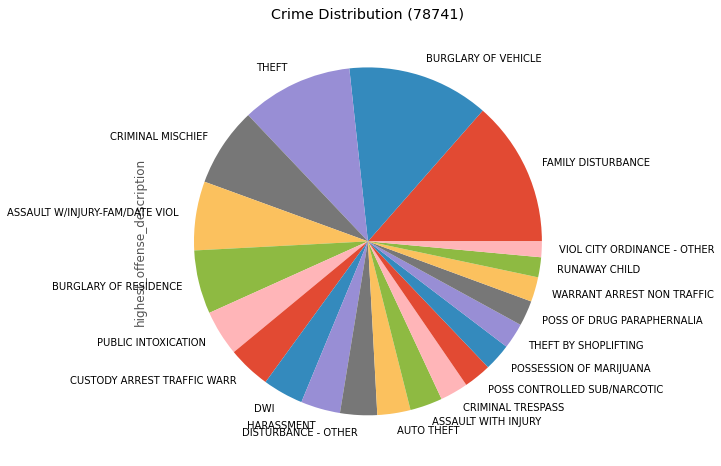

In [13]:
# Examining crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df.zip_code == 78741]

# Create a dataframe for the top crime categories in the zipcode
df_41_off = df_41.highest_offense_description.value_counts().head(21)

# print the different crime values & then as percentages
print(df_41_off)
print("----------------------------------")
print(df_41.highest_offense_description.value_counts(normalize=True).head(21))
df_41_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78741)")

<a id='q5'></a>
### E. Question 5. How is crime distributed in 78745 (far south Austin)?

FAMILY DISTURBANCE                14926
BURGLARY OF VEHICLE               14748
THEFT                             13557
CRIMINAL MISCHIEF                  8509
BURGLARY OF RESIDENCE              5869
ASSAULT W/INJURY-FAM/DATE VIOL     5754
HARASSMENT                         5144
DISTURBANCE - OTHER                4514
DWI                                4419
PUBLIC INTOXICATION                3996
CUSTODY ARREST TRAFFIC WARR        3248
BURGLARY NON RESIDENCE             2877
AUTO THEFT                         2848
ASSAULT WITH INJURY                2666
RUNAWAY CHILD                      2599
POSSESSION OF MARIJUANA            2588
WARRANT ARREST NON TRAFFIC         2108
POSS CONTROLLED SUB/NARCOTIC       2018
THEFT BY SHOPLIFTING               1982
CRIMINAL TRESPASS                  1954
IDENTITY THEFT                     1580
POSS OF DRUG PARAPHERNALIA         1518
Name: highest_offense_description, dtype: int64
----------------------------------
FAMILY DISTURBANCE                0.0

<AxesSubplot:title={'center':'Crime Distribution (78745)'}, ylabel='highest_offense_description'>

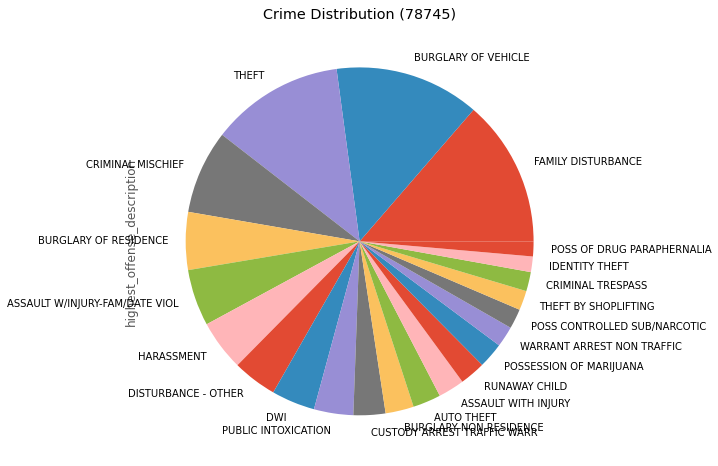

In [14]:
# Examining crime in the 78745 area
df_45 = df[df.zip_code == 78745]

# Create a dataframe for the top 10 crime categories in the zipcode
df_45_off = df_45.highest_offense_description.value_counts().head(22)

# print the different crime values & then as percentages
print(df_45_off)
print("----------------------------------")
print(df_45.highest_offense_description.value_counts(normalize=True).head(22))
df_45_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78745)")

<a id='q6'></a>
### F. Question 6. How is crime distributed in 78705 (UT campus area)?

BURGLARY OF VEHICLE               8623
THEFT                             5603
CRIMINAL MISCHIEF                 4967
THEFT OF BICYCLE                  3477
PUBLIC INTOXICATION               2627
BURGLARY OF RESIDENCE             2120
WARRANT ARREST NON TRAFFIC        1550
CRIMINAL TRESPASS                 1349
AUTO THEFT                        1310
ASSAULT WITH INJURY               1245
DWI                               1220
HARASSMENT                        1216
FAMILY DISTURBANCE                1188
DISTURBANCE - OTHER               1116
BURGLARY NON RESIDENCE             878
CRIMINAL TRESPASS/TRANSIENT        868
VIOL CITY ORDINANCE - OTHER        791
CUSTODY ARREST TRAFFIC WARR        782
GRAFFITI                           778
ASSAULT W/INJURY-FAM/DATE VIOL     691
POSSESSION OF MARIJUANA            659
ASSAULT BY CONTACT                 616
Name: highest_offense_description, dtype: int64

'----------------------------------'

BURGLARY OF VEHICLE               0.150892
THEFT                             0.098045
CRIMINAL MISCHIEF                 0.086916
THEFT OF BICYCLE                  0.060843
PUBLIC INTOXICATION               0.045969
BURGLARY OF RESIDENCE             0.037097
WARRANT ARREST NON TRAFFIC        0.027123
CRIMINAL TRESPASS                 0.023606
AUTO THEFT                        0.022923
ASSAULT WITH INJURY               0.021786
DWI                               0.021348
HARASSMENT                        0.021278
FAMILY DISTURBANCE                0.020788
DISTURBANCE - OTHER               0.019529
BURGLARY NON RESIDENCE            0.015364
CRIMINAL TRESPASS/TRANSIENT       0.015189
VIOL CITY ORDINANCE - OTHER       0.013841
CUSTODY ARREST TRAFFIC WARR       0.013684
GRAFFITI                          0.013614
ASSAULT W/INJURY-FAM/DATE VIOL    0.012092
POSSESSION OF MARIJUANA           0.011532
ASSAULT BY CONTACT                0.010779
Name: highest_offense_description, dtype: float64

<AxesSubplot:title={'center':'Crime Distribution (78705)'}, ylabel='highest_offense_description'>

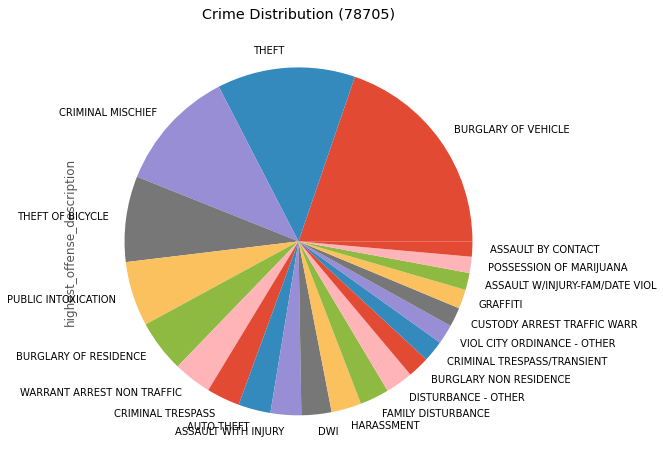

In [15]:
# Examining crime in the 78705 area
df_05 = df[df.zip_code == 78705]

# Create a dataframe for the top 10 crime categories in the zipcode
df_05_off = df_05.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_05_off)
display("----------------------------------")
display(df_05.highest_offense_description.value_counts(normalize=True).head(22))
df_05_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78705)")

<a id='q7'></a>
### H. Question 7. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed? 

In [16]:
# Creating separate dataframes for overall & violent crime
df_viol = df.query(
    'highest_offense_description == ["AGG ASSAULT", "AGG ROBBERY/DEADLY WEAPON", "CAPITAL MURDER", "MURDER", "RAPE"]'
)
df_viol_mur = df.query('highest_offense_description == ["MURDER", "CAPITAL MURDER"]')
df_agg_asslt = df[df.highest_offense_description == "AGG ASSAULT"]
df_agg_robbery = df[df.highest_offense_description == "AGG ROBBERY/DEADLY WEAPON"]

# Creating yearly dataframes
# Annual overall crime
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]

# Annual violent crime
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]

# Annual murders
df_viol_mur_17 = df_viol_mur[df_viol_mur.year == 2017]
df_viol_mur_18 = df_viol_mur[df_viol_mur.year == 2018]
df_viol_mur_19 = df_viol_mur[df_viol_mur.year == 2019]
df_viol_mur_20 = df_viol_mur[df_viol_mur.year == 2020]

78741.0    0.130829
78753.0    0.098840
78758.0    0.094187
78701.0    0.074447
78723.0    0.074412
78702.0    0.074344
78745.0    0.057751
78752.0    0.052345
78744.0    0.052037
78704.0    0.048513
Name: zip_code, dtype: float64

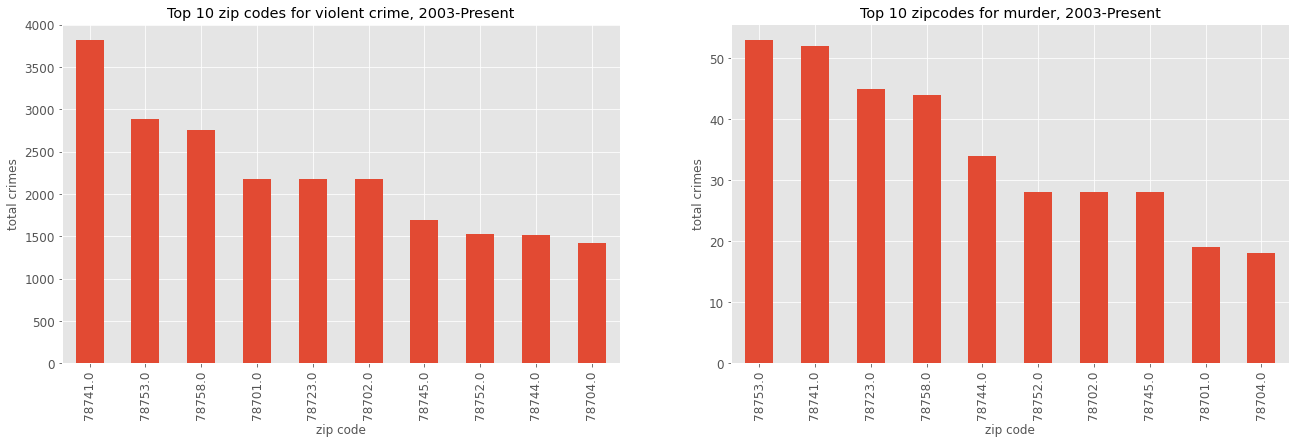

highest_offense_description,AGG ASSAULT,AGG ROBBERY/DEADLY WEAPON,CAPITAL MURDER,MURDER,RAPE
zip_code,,,,,
78610.0,1,0,0,0,0
78613.0,15,11,0,1,6
78617.0,122,62,0,6,37
78621.0,1,0,0,0,0
78634.0,1,0,0,0,0
78652.0,2,0,0,0,0
78653.0,10,3,0,1,1
78660.0,65,28,0,2,17
78664.0,3,0,0,0,0


<Figure size 432x288 with 0 Axes>

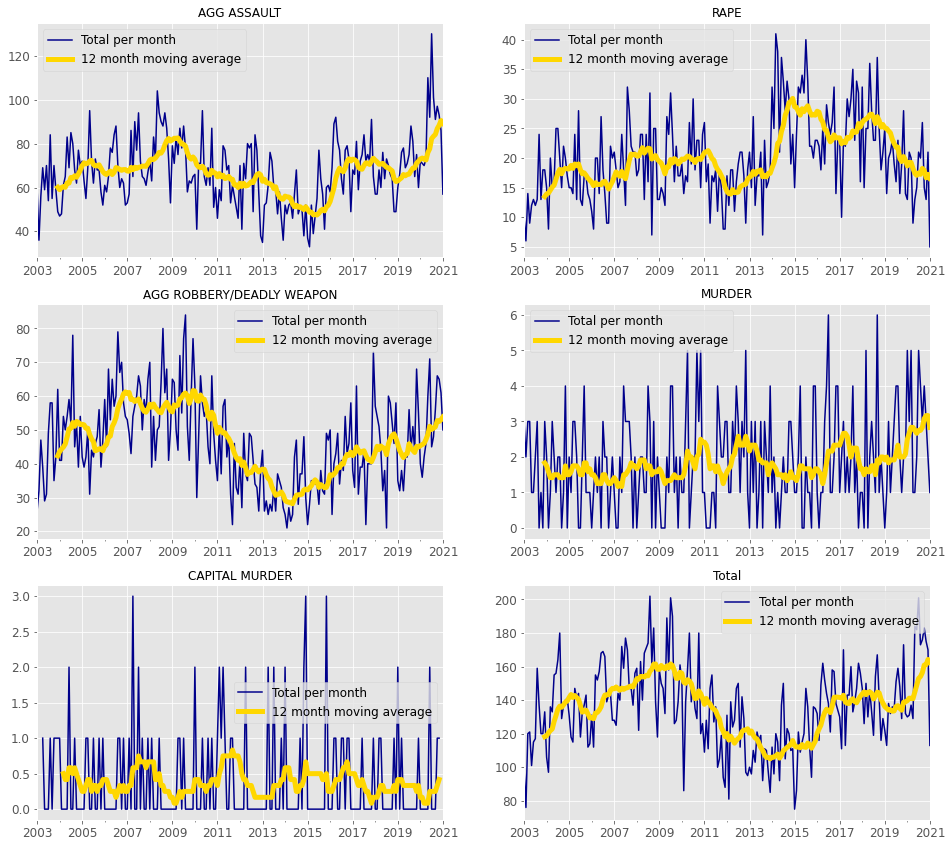

In [17]:
display(df_viol.zip_code.value_counts(normalize=True).head(10))

fig, axs = plt.subplots(figsize=(22, 6.25), ncols=2)
df_viol.zip_code.value_counts().head(10).plot.bar(
    title="Top 10 zip codes for violent crime, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    ax=axs[0],
)
df_viol_mur.zip_code.value_counts().head(10).plot.bar(
    title="Top 10 zipcodes for murder, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    ax=axs[1],
)
plt.show()

viol_freq = pd.crosstab(df_viol.zip_code, df_viol.highest_offense_description)
mur_freq = pd.crosstab(df_viol_mur.zip_code, df_viol_mur.highest_offense_description)
display(viol_freq)

monthly = pd.DataFrame(
    df_viol[df_viol["highest_offense_description"] == "AGG ASSAULT"]
    .resample("M")
    .size()
)
monthly.columns = ["AGG ASSAULT"]

for i in df_viol["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df_viol[df_viol["highest_offense_description"] == i].resample("M").size()
    )

monthly["Total"] = monthly.sum(axis=1)

crimeTypes = monthly.columns

plt.figure(1)
plt.figure(figsize=(16, 25))

i = 521
for eachCrime in crimeTypes:
    plt.subplot(i)
    monthly[eachCrime].plot(color="darkblue", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="gold", linewidth=5, label="12 month moving average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1

#### Distribution of violent crime and murders across council districts, APD Districts, and APD sectors 

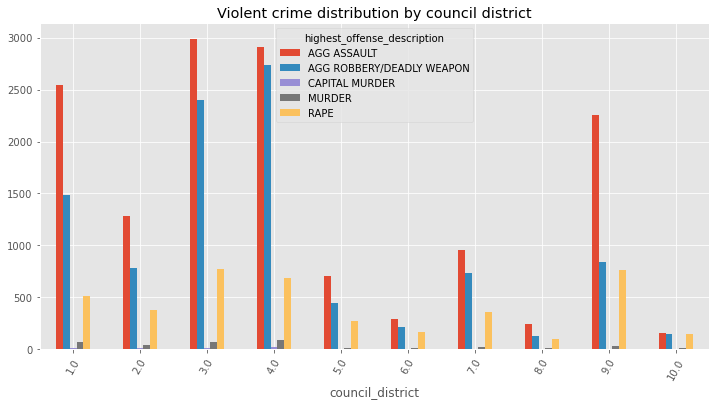

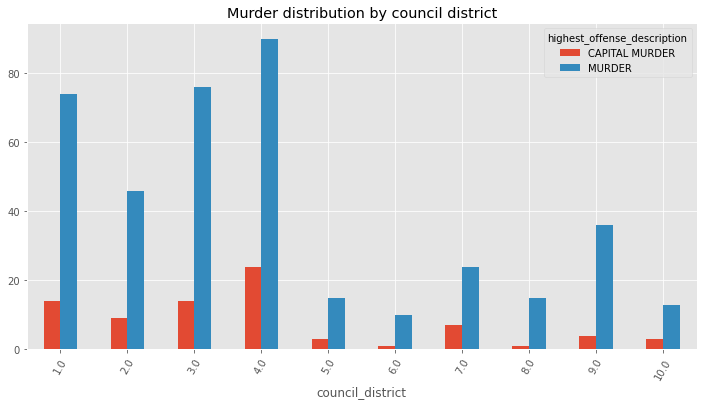

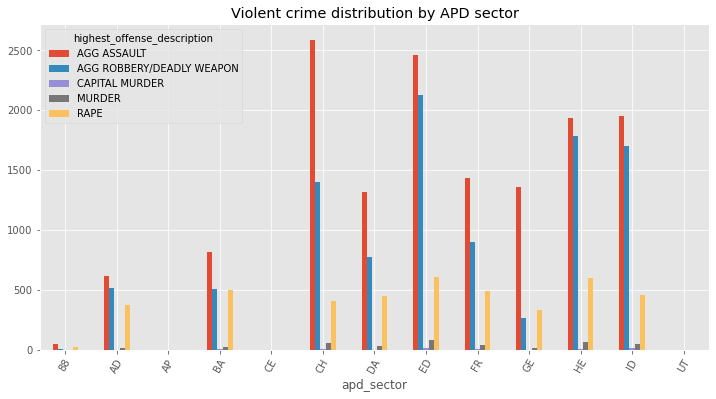

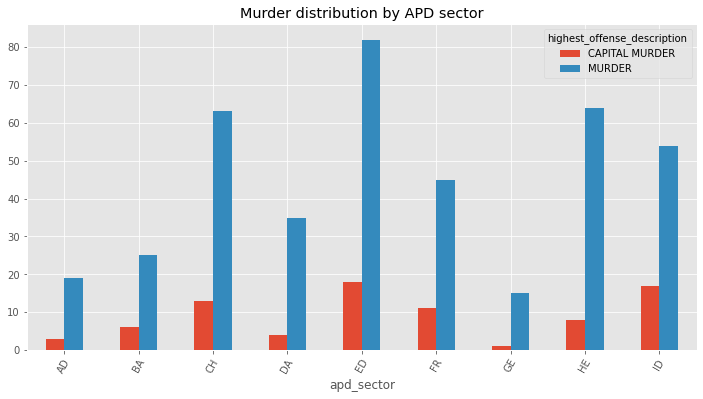

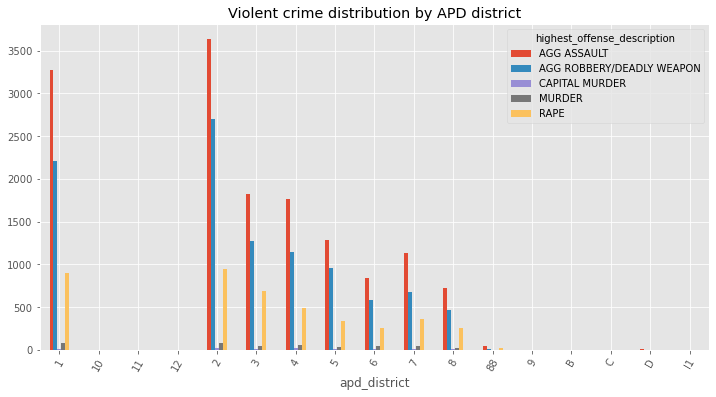

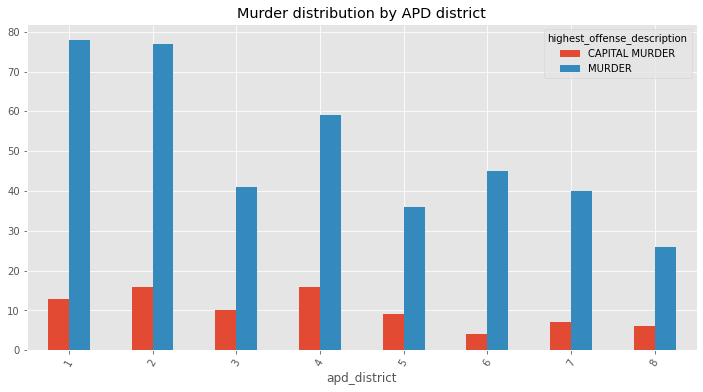

In [18]:
pd.crosstab(df_viol.council_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by council district"
)
plt.show()

pd.crosstab(
    df_viol_mur.council_district, df_viol_mur.highest_offense_description
).plot.bar(figsize=(12, 6), rot=60, title="Murder distribution by council district")
plt.show()

pd.crosstab(df_viol.apd_sector, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol_mur.apd_sector, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Murder distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol.apd_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD district"
)
plt.show()

pd.crosstab(df_viol_mur.apd_district, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Murder distribution by APD district"
)
plt.show()

#### Violent crime and murder distribution by location type

highest_offense_description,AGG ASSAULT,AGG ROBBERY/DEADLY WEAPON,CAPITAL MURDER,MURDER,RAPE
location_type,,,,,
ABANDONED/CONDEMNED STRUCTURE,13,7,0,1,4
AMUSEMENT PARK,0,2,0,0,0
ARENA / STADIUM / FAIRGROUNDS / COLISEUM,2,0,0,0,0
ATM SEPARATE FROM BANK,1,2,0,0,0
AUTO DEALERSHIP NEW / USED,10,2,0,0,1
BANKS / SAVINGS & LOAN,5,134,0,1,1
BAR / NIGHT CLUB,655,45,2,7,77
CAMP / CAMPGROUND,21,2,0,0,3
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE,20,5,1,0,7


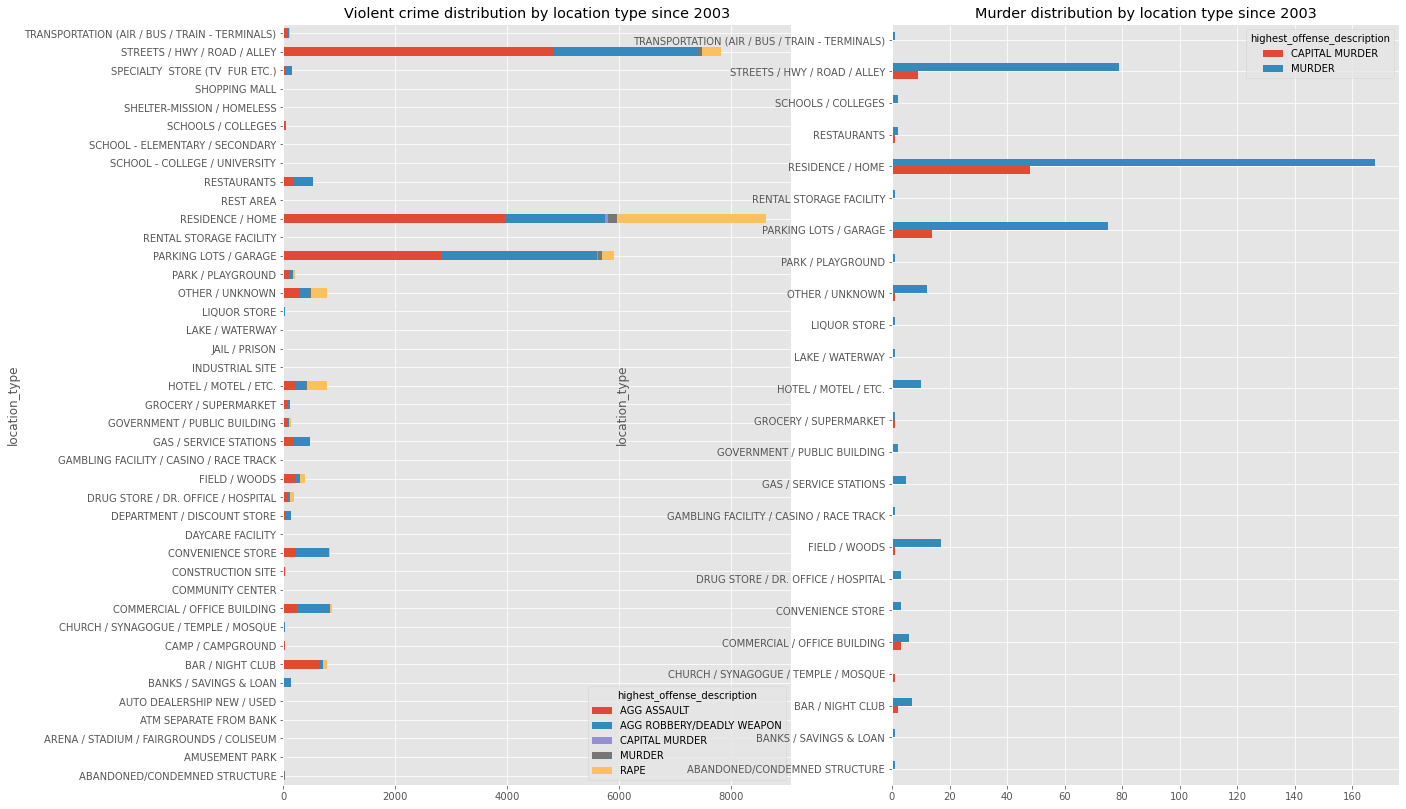

In [19]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.highest_offense_description)
display(viol_loc)
mur_loc = pd.crosstab(
    df_viol_mur.location_type, df_viol_mur.highest_offense_description
)

fig, axs = plt.subplots(figsize=(20, 14), ncols=2)
viol_loc.plot.barh(
    title="Violent crime distribution by location type since 2003",
    ax=axs[0],
    stacked=True,
)
mur_loc.plot.barh(title="Murder distribution by location type since 2003", ax=axs[1])
plt.show()

<a id='q9'></a>
### I. Question 9. How does violent crime appear on the map?

** Note: Rape incidents provide no location coordinates therefore cannot be shown on a map. **

#### Aggravated assault 

In [20]:
agg_asslt_coords_heat = df_agg_asslt[
    (df_agg_asslt["latitude"].isnull() == False)
    & (df_agg_asslt["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(agg_asslt_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="agg_asslt_heatmap.html")

k

#### Armed robbery 

In [21]:
agg_robbery_coords_heat = df_agg_robbery[
    (df_agg_robbery["latitude"].isnull() == False)
    & (df_agg_robbery["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(
        agg_robbery_coords_heat[["latitude", "longitude"]].values, radius=15
    )
)

k.save(outfile="agg_robbery_heatmap.html")

k

<a id='q8'></a>
#### Murder  

In [22]:
mur_coords_heat = df_viol_mur[
    (df_viol_mur["latitude"].isnull() == False)
    & (df_viol_mur["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(mur_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="mur_heatmap.html")

k

<a id='q10'></a>
### J. Question 10. Are there any addresses where violent crime and murder occurs frequently?

In [23]:
# Show addresses with 50 or more reported violent crimes
df_viol.address.value_counts().head(13)

500 E 7TH ST                83
9515 N LAMAR BLVD           66
1700 BURTON DR              63
6409 SPRINGDALE RD          59
00 BLOCK UNKNOWN            59
9601 MIDDLE FISKVILLE RD    58
900 BLOCK E 32ND ST         54
1071 CLAYTON LN             53
9200 NORTH PLZ              53
1030 NORWOOD PARK BLVD      53
2237 E RIVERSIDE DR         51
1137 GUNTER ST              51
1124 RUTLAND DR             50
Name: address, dtype: int64

In [24]:
# Show addresses with 2 or more reported murders
df_viol_mur.address.value_counts().head(30)

4700 E RIVERSIDE DR          3
8800 N IH 35 SVRD SB         3
6407 SPRINGDALE RD           3
6409 SPRINGDALE RD           3
8610 N LAMAR BLVD            3
605 MASTERSON PASS           2
8225 SAM RAYBURN DR          2
8912 N LAMAR BLVD            2
201 W 5TH ST                 2
2713 S CONGRESS AVE          2
744 W WILLIAM CANNON DR      2
1050 SPRINGDALE RD           2
7000 DECKER LN               2
2915 S IH 35 SVRD NB         2
2501 ANKEN DR                2
815 W SLAUGHTER LN           2
9200 NORTH PLZ               2
1137 GUNTER ST               2
9601 MIDDLE FISKVILLE RD     2
9220 N IH 35 SVRD SB         2
6118 FAIRWAY ST              2
2508 E RIVERSIDE DR          2
6600 ED BLUESTEIN BLVD SB    2
10503 N LAMAR BLVD           2
601 E 15TH ST                2
833 FAIRFIELD DR             2
2400 WICKERSHAM LN           2
10610 MORADO CIR             2
9010 GALEWOOD DR             2
1711 RUTLAND DR              2
Name: address, dtype: int64

In [25]:
df_clean = df.copy()
df_clean.to_csv("df_clean.csv")

df_17.to_csv("df_17.csv")
df_18.to_csv("df_18.csv")
df_19.to_csv("df_19.csv")
df_20.to_csv("df_20.csv")

df_viol_17.to_csv("df_viol_17.csv")
df_viol_18.to_csv("df_viol_18.csv")
df_viol_19.to_csv("df_viol_19.csv")
df_viol_20.to_csv("df_viol_20.csv")

df_viol_mur_17.to_csv("df_viol_mur_17.csv")
df_viol_mur_18.to_csv("df_viol_mur_18.csv")
df_viol_mur_19.to_csv("df_viol_mur_19.csv")
df_viol_mur_20.to_csv("df_viol_mur_20.csv")

df_viol.to_csv("df_viol.csv")
df_viol_mur.to_csv("df_viol_mur.csv")

df_01.to_csv("df_01.csv")
df_53.to_csv("df_53.csv")
df_41.to_csv("df_41.csv")
df_45.to_csv("df_45.csv")
df_05.to_csv("df_05.csv")